In [1]:
import re
import numpy

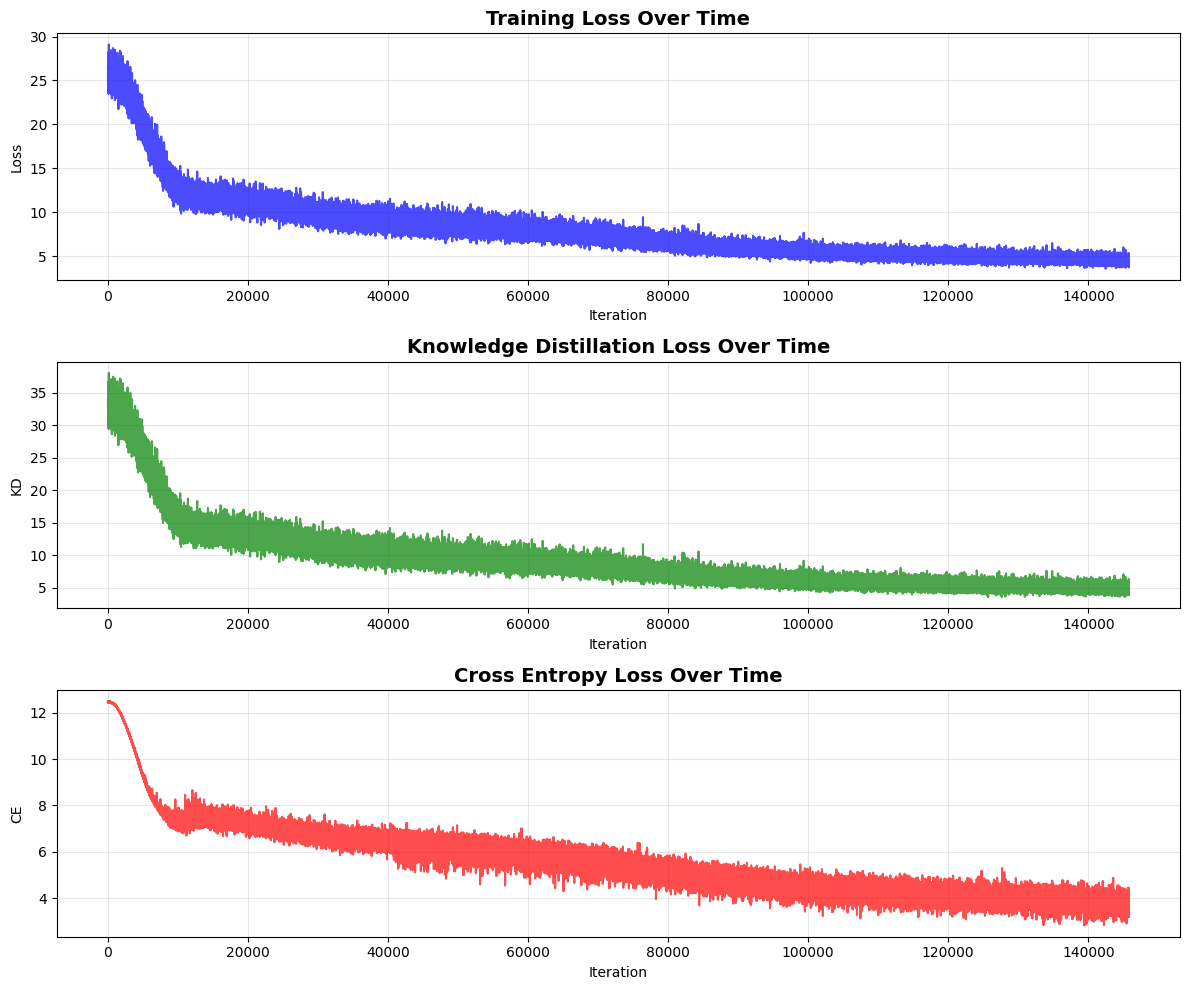

Summary Statistics:

Loss - Min: 3.5429, Max: 29.0852, Mean: 8.0075, Final: 4.2039
KD   - Min: 3.5750, Max: 38.0306, Mean: 9.2660, Final: 4.5925
CE   - Min: 2.8210, Max: 12.4993, Mean: 5.6702, Final: 3.4821

Total iterations found: 145809


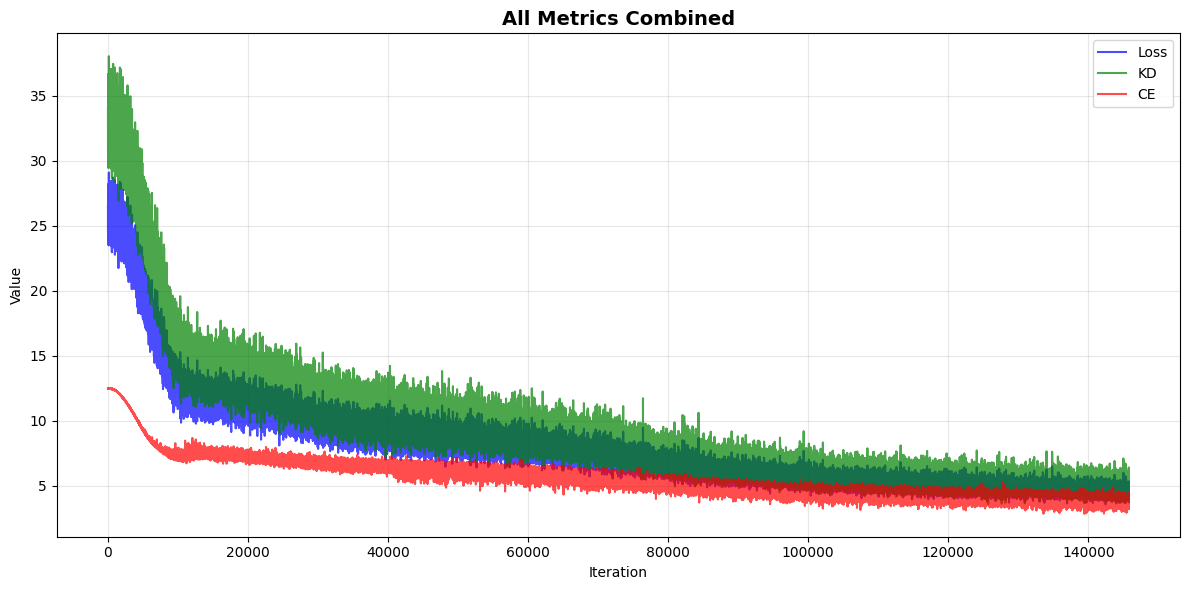

In [3]:
import re
import matplotlib.pyplot as plt
import numpy as np

# Read the log file
with open('train.log', 'r') as f:
    log_data = f.read()

# Regex pattern to extract loss, kd, and ce values
pattern = r'loss=(\d+\.\d+),\s*kd=(\d+\.\d+),\s*ce=(\d+\.\d+)'

# Extract all matches
matches = re.findall(pattern, log_data)

# Convert to numpy arrays for easier plotting
loss_values = np.array([float(m[0]) for m in matches])
kd_values = np.array([float(m[1]) for m in matches])
ce_values = np.array([float(m[2]) for m in matches])

# Create iteration numbers (x-axis)
iterations = np.arange(len(loss_values))

# Create the plot
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Plot Loss
axes[0].plot(iterations, loss_values, color='blue', linewidth=1.5, alpha=0.7)
axes[0].set_title('Training Loss Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('Loss')
axes[0].grid(True, alpha=0.3)

# Plot KD (Knowledge Distillation)
axes[1].plot(iterations, kd_values, color='green', linewidth=1.5, alpha=0.7)
axes[1].set_title('Knowledge Distillation Loss Over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('KD')
axes[1].grid(True, alpha=0.3)

# Plot CE (Cross Entropy)
axes[2].plot(iterations, ce_values, color='red', linewidth=1.5, alpha=0.7)
axes[2].set_title('Cross Entropy Loss Over Time', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Iteration')
axes[2].set_ylabel('CE')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Summary Statistics:")
print(f"\nLoss - Min: {loss_values.min():.4f}, Max: {loss_values.max():.4f}, Mean: {loss_values.mean():.4f}, Final: {loss_values[-1]:.4f}")
print(f"KD   - Min: {kd_values.min():.4f}, Max: {kd_values.max():.4f}, Mean: {kd_values.mean():.4f}, Final: {kd_values[-1]:.4f}")
print(f"CE   - Min: {ce_values.min():.4f}, Max: {ce_values.max():.4f}, Mean: {ce_values.mean():.4f}, Final: {ce_values[-1]:.4f}")
print(f"\nTotal iterations found: {len(loss_values)}")

# Optional: Create a combined plot
fig2, ax = plt.subplots(figsize=(12, 6))
ax.plot(iterations, loss_values, label='Loss', color='blue', linewidth=1.5, alpha=0.7)
ax.plot(iterations, kd_values, label='KD', color='green', linewidth=1.5, alpha=0.7)
ax.plot(iterations, ce_values, label='CE', color='red', linewidth=1.5, alpha=0.7)
ax.set_title('All Metrics Combined', fontsize=14, fontweight='bold')
ax.set_xlabel('Iteration')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [5]:
# Cell: Evaluate Checkpoint with Fill-Mask Examples

import torch
from transformers import XLMRobertaForMaskedLM, AutoTokenizer, pipeline

# ============================================================
# 1. SETUP
# ============================================================
CHECKPOINT_PATH = "outputs/best_model"  # Change to your checkpoint path
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

print("="*60)
print("CHECKPOINT EVALUATION - FILL MASK TEST")
print("="*60)
print(f"Checkpoint: {CHECKPOINT_PATH}")
print(f"Device: {DEVICE}")
print("="*60)

# ============================================================
# 2. LOAD MODEL & TOKENIZER
# ============================================================
print("\nLoading model and tokenizer...")

# Load tokenizer (use XLM-RoBERTa tokenizer)
tokenizer = AutoTokenizer.from_pretrained("FacebookAI/xlm-roberta-base")

# Load your trained model
model = XLMRobertaForMaskedLM.from_pretrained(CHECKPOINT_PATH)
model.to(DEVICE)
model.eval()

# Model info
num_params = sum(p.numel() for p in model.parameters()) / 1e6
print(f"✓ Model loaded: {num_params:.1f}M parameters")

# ============================================================
# 3. CREATE FILL-MASK PIPELINE
# ============================================================
fill_mask = pipeline(
    "fill-mask",
    model=model,
    tokenizer=tokenizer,
    device=0 if DEVICE == "cuda" else -1
)

# ============================================================
# 4. TEST WITH HINDI EXAMPLES
# ============================================================
print("\n" + "="*60)
print("FILL-MASK PREDICTIONS")
print("="*60)

test_sentences = [
    # Complex sentences with multiple context clues
    "भारतीय स्वतंत्रता संग्राम में महात्मा गांधी ने <mask> आंदोलन का नेतृत्व किया",  
    # Mahatma Gandhi led the <mask> movement in the Indian independence struggle
    
    "विज्ञान और <mask> के क्षेत्र में भारत ने उल्लेखनीय प्रगति की है",  
    # India has made remarkable progress in the field of science and <mask>
    
    "हिमालय पर्वत श्रृंखला एशिया की सबसे <mask> पर्वत श्रृंखला है",  
    # The Himalayan mountain range is the most <mask> mountain range in Asia
    
    "भारतीय संविधान दुनिया का सबसे <mask> लिखित संविधान माना जाता है",  
    # The Indian Constitution is considered the world's most <mask> written constitution
    
    "आधुनिक युग में <mask> और संचार प्रौद्योगिकी ने जीवन को पूरी तरह बदल दिया है",  
    # In the modern era, <mask> and communication technology has completely transformed life
    
    "भारतीय अर्थव्यवस्था कृषि, उद्योग और <mask> क्षेत्र पर आधारित है",  
    # The Indian economy is based on agriculture, industry and the <mask> sector
    
    "शिक्षा प्रणाली में <mask> और नवाचार की आवश्यकता है",  
    # The education system needs <mask> and innovation
    
    "जलवायु परिवर्तन एक <mask> समस्या है जिसका समाधान तत्काल आवश्यक है",  
    # Climate change is a <mask> problem that requires immediate solution
    
    "भारतीय संस्कृति में <mask> और परंपराओं का विशेष महत्व है",  
    # In Indian culture, <mask> and traditions have special significance
    
    "डिजिटल इंडिया अभियान के तहत <mask> सेवाओं का विस्तार किया जा रहा है"  
    # Under the Digital India campaign, <mask> services are being expanded
]

for i, sentence in enumerate(test_sentences, 1):
    print(f"\n{i}. Input: {sentence}")
    print("-" * 60)
    
    try:
        predictions = fill_mask(sentence, top_k=5)
        
        for rank, pred in enumerate(predictions, 1):
            token = pred['token_str'].strip()
            score = pred['score']
            filled = pred['sequence']
            
            print(f"   {rank}. {token:15s} (score: {score:.4f})")
            
        # Show the top prediction in context
        print(f"\n   → Best: {predictions[0]['sequence']}")
        
    except Exception as e:
        print(f"   ⚠ Error: {e}")

print("\n" + "="*60)
print("EVALUATION COMPLETE")
print("="*60)

CHECKPOINT EVALUATION - FILL MASK TEST
Checkpoint: outputs/best_model
Device: cuda

Loading model and tokenizer...


Device set to use cuda:0


✓ Model loaded: 33.1M parameters

FILL-MASK PREDICTIONS

1. Input: भारतीय स्वतंत्रता संग्राम में महात्मा गांधी ने <mask> आंदोलन का नेतृत्व किया
------------------------------------------------------------
   1. इस              (score: 0.0891)
   2. एक              (score: 0.0693)
   3. अपने            (score: 0.0682)
   4. केंद्रीय        (score: 0.0505)
   5. मोदी            (score: 0.0285)

   → Best: भारतीय स्वतंत्रता संग्राम में महात्मा गांधी ने इस आंदोलन का नेतृत्व किया

2. Input: विज्ञान और <mask> के क्षेत्र में भारत ने उल्लेखनीय प्रगति की है
------------------------------------------------------------
   1. भारत            (score: 0.1659)
   2. देश             (score: 0.0524)
   3. पर्यावरण        (score: 0.0475)
   4. यूरोप           (score: 0.0445)
   5. विकास           (score: 0.0406)

   → Best: विज्ञान और भारत के क्षेत्र में भारत ने उल्लेखनीय प्रगति की है

3. Input: हिमालय पर्वत श्रृंखला एशिया की सबसे <mask> पर्वत श्रृंखला है
------------------------------------------------

In [7]:
# Quick Perplexity Test

import torch
from transformers import XLMRobertaForMaskedLM, AutoTokenizer
import numpy as np

# Load
checkpoint = "outputs/best_model"
tokenizer = AutoTokenizer.from_pretrained("FacebookAI/xlm-roberta-base")
model = XLMRobertaForMaskedLM.from_pretrained(checkpoint).to("cuda").eval()

# Test sentences
sentences = [
    "भारतीय स्वतंत्रता संग्राम में महात्मा गांधी ने अहिंसक आंदोलन का नेतृत्व किया",
    "विज्ञान और प्रौद्योगिकी के क्षेत्र में भारत ने उल्लेखनीय प्रगति की है",
    "हिमालय पर्वत श्रृंखला एशिया की सबसे ऊंची पर्वत श्रृंखला है",
    "भारतीय संविधान दुनिया का सबसे बड़ा लिखित संविधान माना जाता है",
    "आधुनिक युग में सूचना और संचार प्रौद्योगिकी ने जीवन को बदल दिया है"
]

# Calculate perplexity
ppls = []
with torch.no_grad():
    for sent in sentences:
        inputs = tokenizer(sent, return_tensors="pt").to("cuda")
        outputs = model(**inputs, labels=inputs["input_ids"])
        ppl = torch.exp(outputs.loss).item()
        ppls.append(ppl)
        print(f"PPL: {ppl:6.2f} | {sent[:50]}...")

print(f"\nAverage Perplexity: {np.mean(ppls):.2f}")

PPL:   4.56 | भारतीय स्वतंत्रता संग्राम में महात्मा गांधी ने अहि...
PPL:   3.41 | विज्ञान और प्रौद्योगिकी के क्षेत्र में भारत ने उल्...
PPL:   6.45 | हिमालय पर्वत श्रृंखला एशिया की सबसे ऊंची पर्वत श्र...
PPL:   6.86 | भारतीय संविधान दुनिया का सबसे बड़ा लिखित संविधान म...
PPL:   3.08 | आधुनिक युग में सूचना और संचार प्रौद्योगिकी ने जीवन...

Average Perplexity: 4.87
